# Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ast
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import normalize
from keras.preprocessing import image
from time import time
from scipy.spatial.distance import cosine, euclidean, hamming

# Loading Data

In [3]:
recipe = pd.read_csv('RAW_recipes.csv')
# recipe = recipe.drop(columns=['cooking_directions', 'reviews'])
recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


# Data Cleaning

In [5]:
# Salecting the Columns:

recipe = recipe[['id','name','nutrition',  'ingredients','minutes', 'n_steps', 'steps', 'tags', 'description']] 
recipe

,id,name,nutrition,ingredients,minutes,n_steps,steps,tags,description
0,137739,arriba baked winter squash mexican style,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['winter squash', 'mexican seasoning', 'mixed ...",55,11,"['make a choice and proceed with recipe', 'dep...","['60-minutes-or-less', 'time-to-make', 'course...",autumn is my favorite time of year to cook! th...
1,31490,a bit different breakfast pizza,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['prepared pizza crust', 'sausage patty', 'egg...",30,9,"['preheat oven to 425 degrees f', 'press dough...","['30-minutes-or-less', 'time-to-make', 'course...",this recipe calls for the crust to be prebaked...
2,112140,all in the kitchen chili,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['ground beef', 'yellow onions', 'diced tomato...",130,6,"['brown ground beef in large pot', 'add choppe...","['time-to-make', 'course', 'preparation', 'mai...",this modified version of 'mom's' chili was a h...
3,59389,alouette potatoes,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['spreadable cheese with garlic and herbs', 'n...",45,11,['place potatoes in a large pot of lightly sal...,"['60-minutes-or-less', 'time-to-make', 'course...","this is a super easy, great tasting, make ahea..."
4,44061,amish tomato ketchup for canning,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['tomato juice', 'apple cider vinegar', 'sugar...",190,5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['weeknight', 'time-to-make', 'course', 'main-...",my dh's amish mother raised him on this recipe...
...,...,...,...,...,...,...,...,...,...
231632,486161,zydeco soup,"[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]","['celery', 'onion', 'green sweet pepper', 'gar...",60,7,"['heat oil in a 4-quart dutch oven', 'add cele...","['ham', '60-minutes-or-less', 'time-to-make', ...",this is a delicious soup that i originally fou...
231633,493372,zydeco spice mix,"[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]","['paprika', 'salt', 'garlic powder', 'onion po...",5,1,['mix all ingredients together thoroughly'],"['15-minutes-or-less', 'time-to-make', 'course...",this spice mix will make your taste buds dance!
231634,308080,zydeco ya ya deviled eggs,"[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]","['hard-cooked eggs', 'mayonnaise', 'dijon must...",40,7,"['in a bowl , combine the mashed yolks and may...","['60-minutes-or-less', 'time-to-make', 'course...","deviled eggs, cajun-style"
231635,298512,cookies by design cookies on a stick,"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]","['butter', 'eagle brand condensed milk', 'ligh...",29,9,['place melted butter in a large mixing bowl a...,"['30-minutes-or-less', 'time-to-make', 'course...","i've heard of the 'cookies by design' company,..."


In [6]:
# Checking out the null or missing values
recipe.isnull().sum()

id                0
name              1
nutrition         0
ingredients       0
minutes           0
n_steps           0
steps             0
tags              0
description    4979
dtype: int64

In [7]:
# filtering out the rows containg missing values
recipe = recipe.dropna()
recipe.isnull().sum()

id             0
name           0
nutrition      0
ingredients    0
minutes        0
n_steps        0
steps          0
tags           0
description    0
dtype: int64

In [8]:
# nutrition
# Nutrition information 
# (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
# [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]

# We are considering the two parameters for the Dietary:
# - Calories (#)
# - Protein (PDV) 

In [10]:
list_of_dict = []

for row in recipe.nutrition:
    list_of_dict.append(ast.literal_eval(row))
list_of_dict[1]



# extract percent daily values for selected nutritions
calories_list = []
protein_list = []


for x in range(len(list_of_dict)):
    calories_list.append(list_of_dict[x][0])
    protein_list.append(list_of_dict[x][4])
    
    
# group all the data into dataframe
data = {'calories': calories_list, 'protein': protein_list}

df = pd.DataFrame(data)
df.index = recipe['id']
df.head()

,calories,protein
id,,
137739,51.5,2.0
31490,173.4,22.0
112140,269.8,39.0
59389,368.1,14.0
44061,352.9,3.0


In [ ]:
recipe_cleaned= pd.merge(recipe, df, on='id')
recipe_cleaned= recipe_cleaned.drop(columns=['nutrition'])

In [3]:
recipe_cleaned= recipe_cleaned.drop(columns='Unnamed: 0')

In [4]:
recipe_cleaned.columns

Index(['id', 'name', 'ingredients', 'minutes', 'n_steps', 'steps', 'tags',
       'description', 'calories', 'protein'],
      dtype='object')

In [5]:
# rename  the columns name
recipe_cleaned = recipe_cleaned.rename(columns={'id':'recipe_id', 'name':'recipe_name', 'ingredients':'ingredients_list', 'steps':'precedure_steps', 'calories':'calories(in kcal)','protein':'protein(in PDV)'})

In [6]:
recipe_cleaned.columns


Index(['recipe_id', 'recipe_name', 'ingredients_list', 'minutes', 'n_steps',
       'precedure_steps', 'tags', 'description', 'calories(in kcal)',
       'protein(in PDV)'],
      dtype='object')

In [7]:
recipe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226657 entries, 0 to 226656
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   recipe_id          226657 non-null  int64  
 1   recipe_name        226657 non-null  object 
 2   ingredients_list   226657 non-null  object 
 3   minutes            226657 non-null  int64  
 4   n_steps            226657 non-null  int64  
 5   precedure_steps    226657 non-null  object 
 6   tags               226657 non-null  object 
 7   description        226657 non-null  object 
 8   calories(in kcal)  226657 non-null  float64
 9   protein(in PDV)    226657 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 17.3+ MB


In [8]:
recipe_cleaned.describe()

,recipe_id,minutes,n_steps,calories(in kcal),protein(in PDV)
count,226657.000000,2.266570e+05,226657.000000,226657.000000,226657.000000
mean,226097.564368,9.602472e+03,9.773927,471.662774,34.600458
std,139802.640862,4.510715e+06,5.999824,1194.845397,58.483655
min,38.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,105707.000000,2.000000e+01,6.000000,174.500000,7.000000
50%,211971.000000,4.000000e+01,9.000000,313.300000,18.000000
75%,336737.000000,6.500000e+01,12.000000,518.700000,51.000000
max,537716.000000,2.147484e+09,145.000000,434360.200000,6552.000000


## Histograms and Boxplots

Plot the histograms and boxplots for all the numeric features (minutes, n_steps, calories (in kcal), and protein (in PDV)) along with filtering rows based on the IQR.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot histogram and boxplot
def plot_distribution(data, column, bins=20):
    plt.figure(figsize=(14, 6))

    # Histogram
    # plt.subplot(1, 2, 1)
    plt.hist(data[column], bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    # plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

    # Print the Statistics of the Colums
    print('Mean:', data[column].mean())
    print('Median:', data[column].median())
    print('Mode:', data[column].mode())



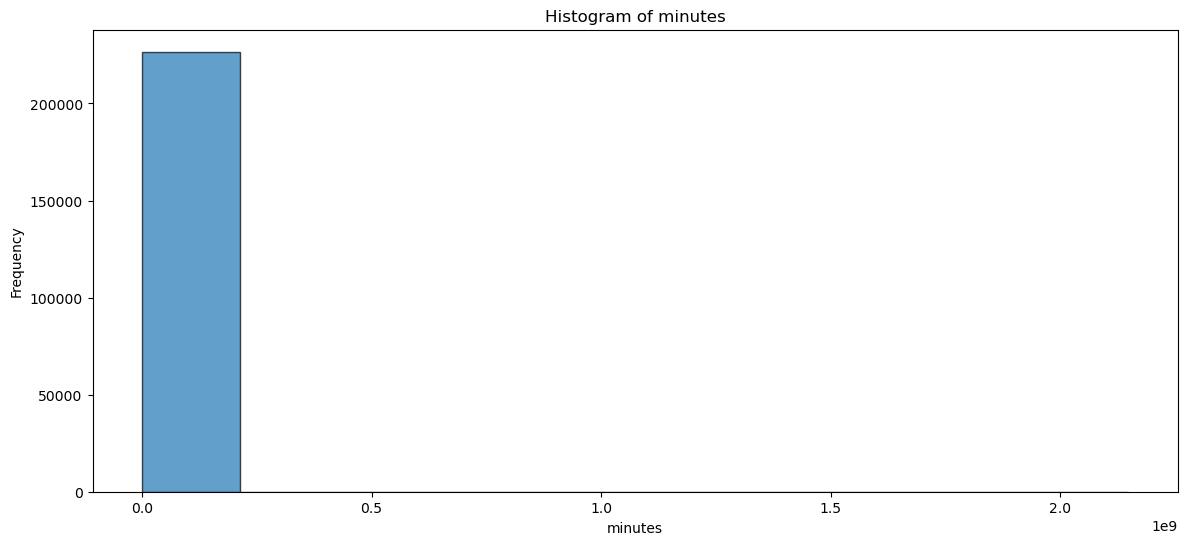

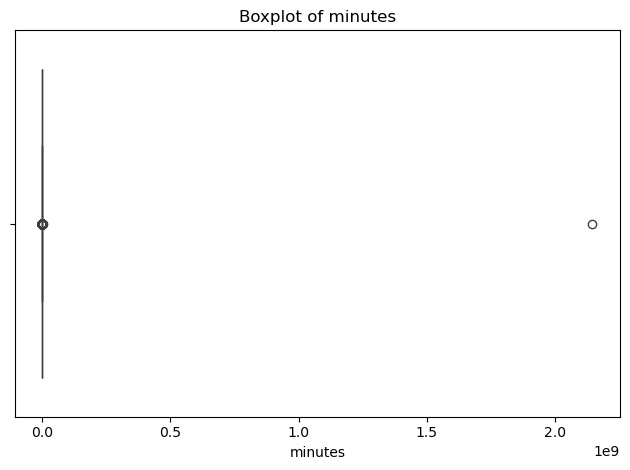

Mean: 9602.472193667083
Median: 40.0
Mode: 0    30
Name: minutes, dtype: int64


In [10]:
# Plot for minutes
plot_distribution(recipe_cleaned, 'minutes', bins=10)

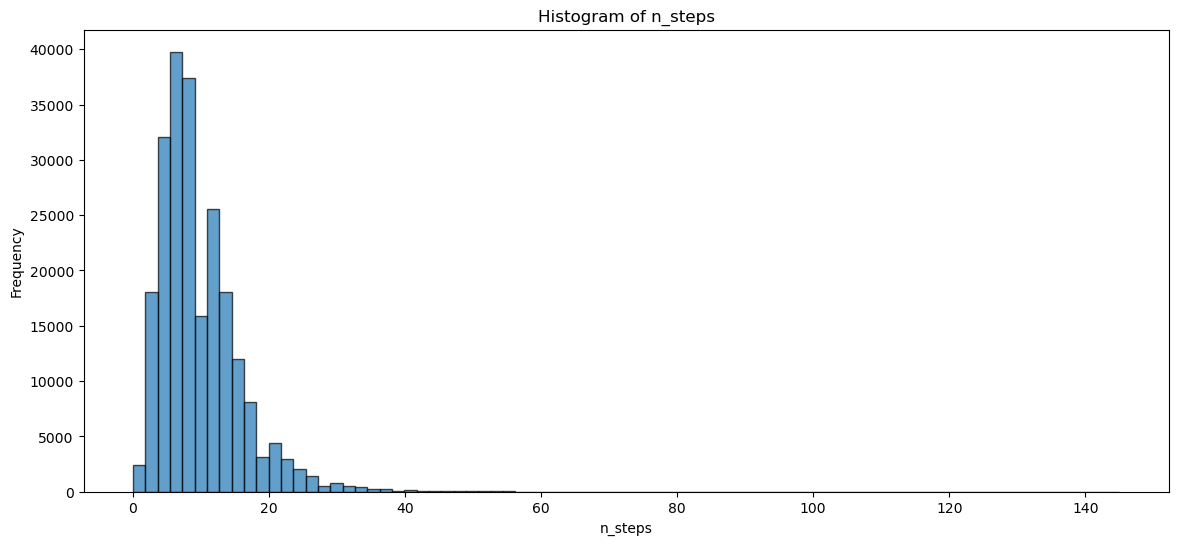

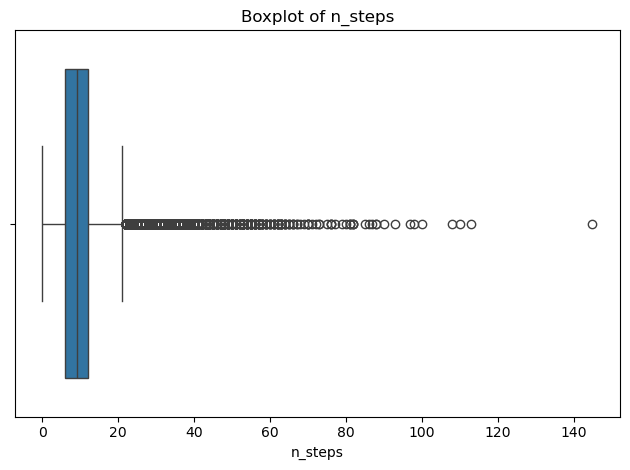

Mean: 9.773927123362615
Median: 9.0
Mode: 0    7
Name: n_steps, dtype: int64


In [11]:
# Plot for n_steps
plot_distribution(recipe_cleaned, 'n_steps', bins=80)

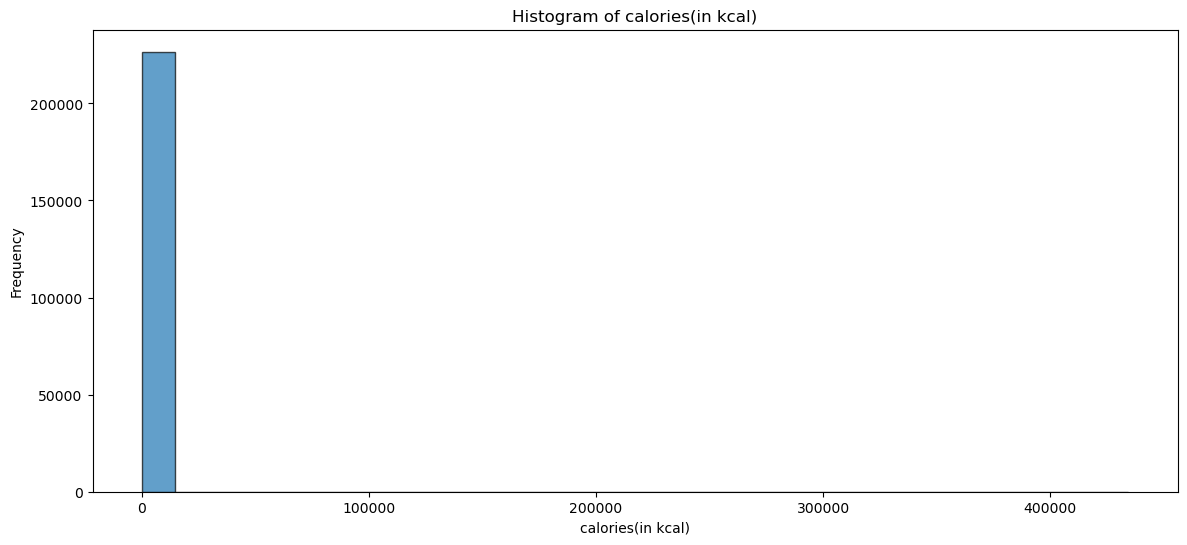

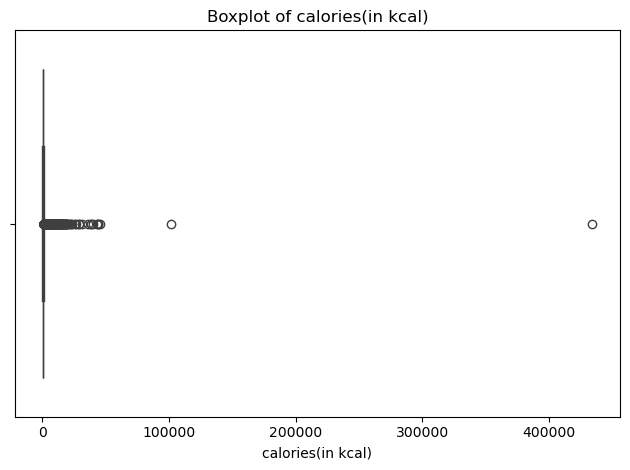

Mean: 471.6627737065257
Median: 313.3
Mode: 0    105.0
Name: calories(in kcal), dtype: float64


In [12]:
# Plot for calories (in kcal)
plot_distribution(recipe_cleaned, 'calories(in kcal)', bins=30)

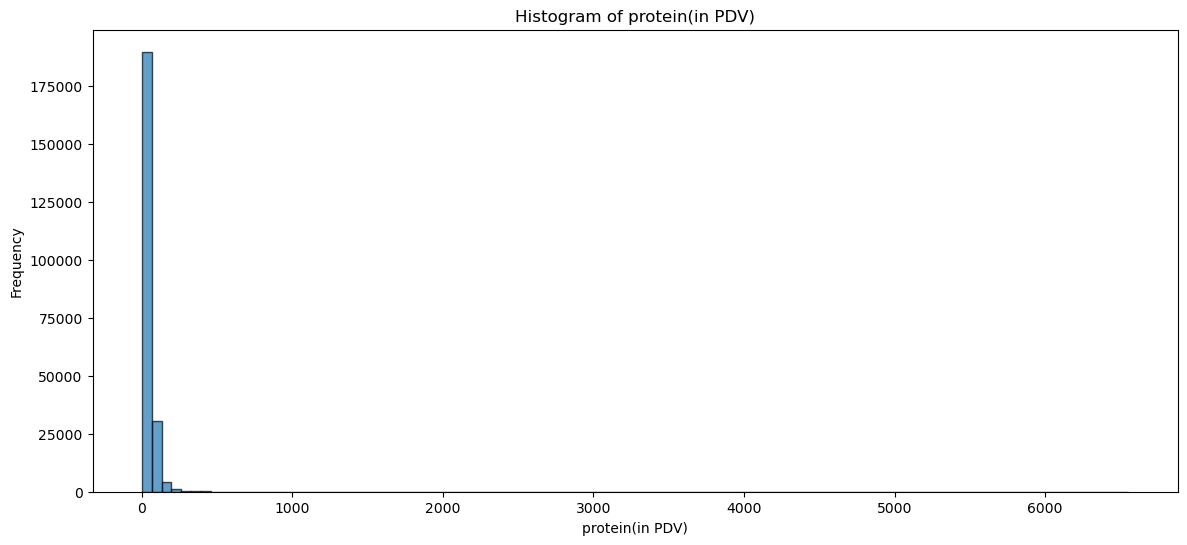

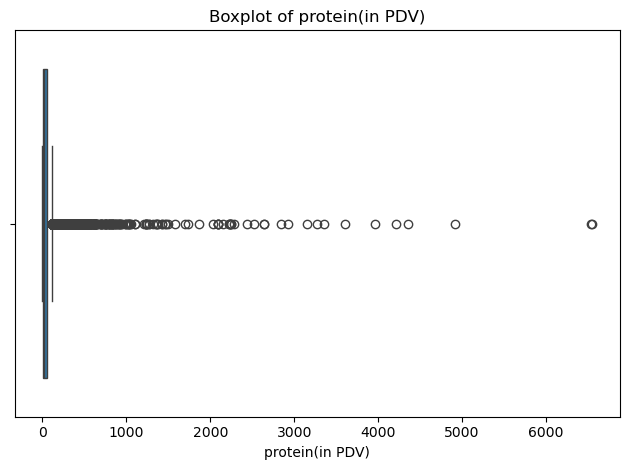

Mean: 34.600457960707146
Median: 18.0
Mode: 0    0.0
Name: protein(in PDV), dtype: float64


In [13]:
# Plot for protein (in PDV)
plot_distribution(recipe_cleaned, 'protein(in PDV)', bins=100)

## Filtering Rows Based on IQR
To filter out outliers based on the Interquartile Range (IQR):

Outliers are values below Q1-1.5×IQR or above Q3+1.5×IQR.

In [14]:
def filter_outliers(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return filtered_data

In [15]:
print(f"Original dataset size: {recipe_cleaned.shape[0]}")

# Filter rows for each column
recipe_cleaned = filter_outliers(recipe_cleaned, 'minutes')
recipe_cleaned = filter_outliers(recipe_cleaned, 'n_steps')
recipe_cleaned = filter_outliers(recipe_cleaned, 'calories(in kcal)')
recipe_cleaned = filter_outliers(recipe_cleaned, 'protein(in PDV)')

# Print results
print(f"Filtered dataset size: {recipe_cleaned.shape[0]}")

Original dataset size: 226657
Filtered dataset size: 178023


## Vizualizing the distribution of the numeric value of the filtered data

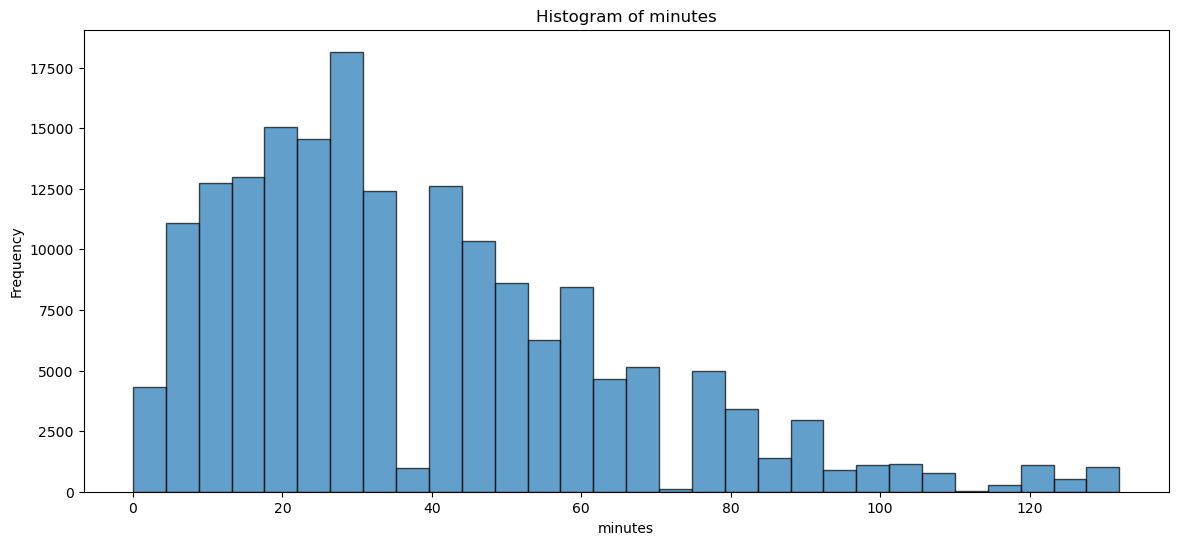

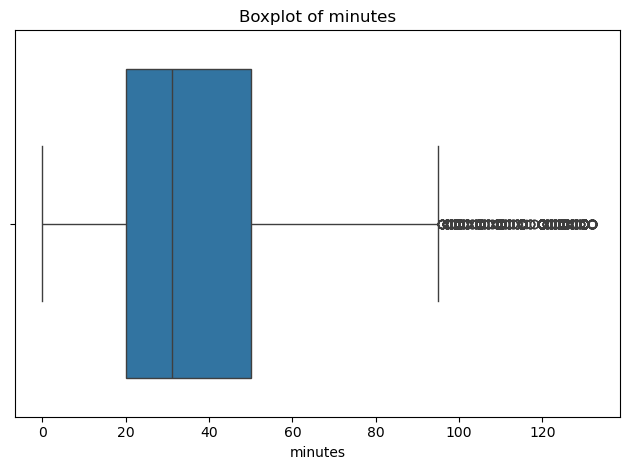

Mean: 38.08644950371581
Median: 31.0
Mode: 0    30
Name: minutes, dtype: int64


In [16]:
# Plot for minutes
plot_distribution(recipe_cleaned, 'minutes', bins=30)


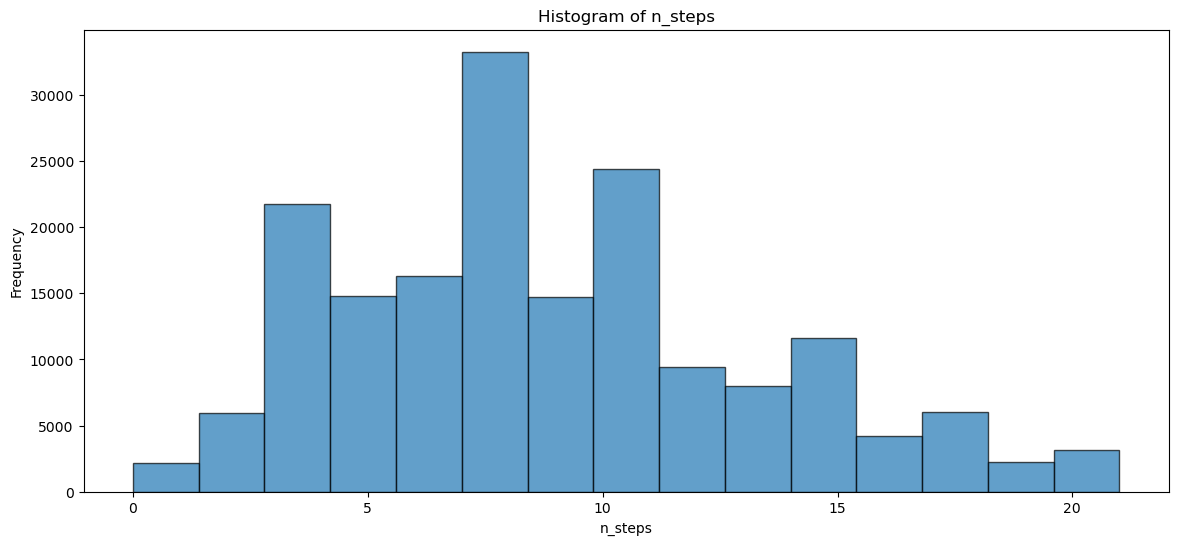

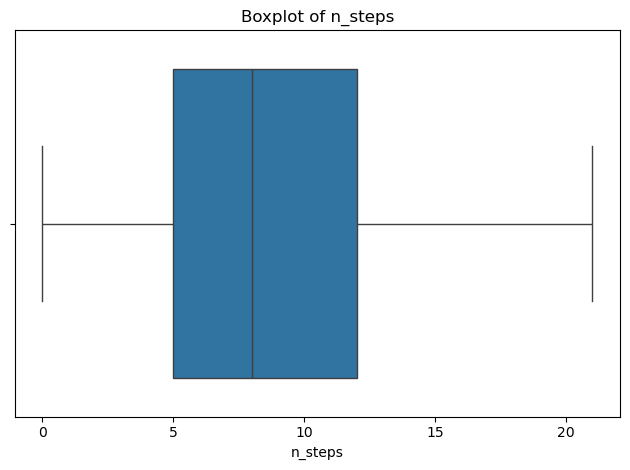

Mean: 8.787218505474012
Median: 8.0
Mode: 0    7
Name: n_steps, dtype: int64


In [17]:
# Plot for n_steps
plot_distribution(recipe_cleaned, 'n_steps', bins=15)


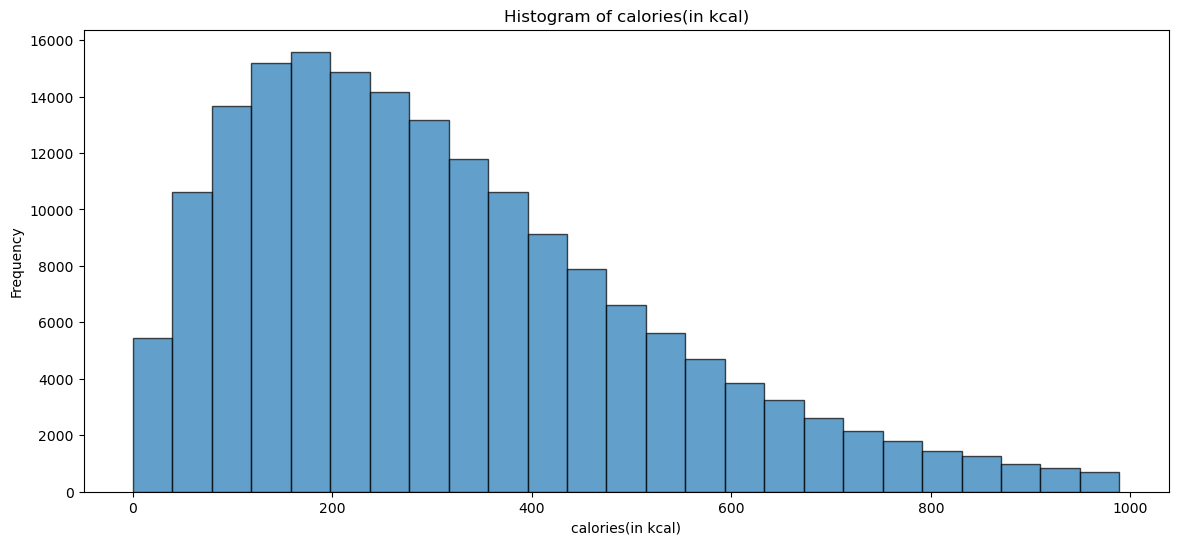

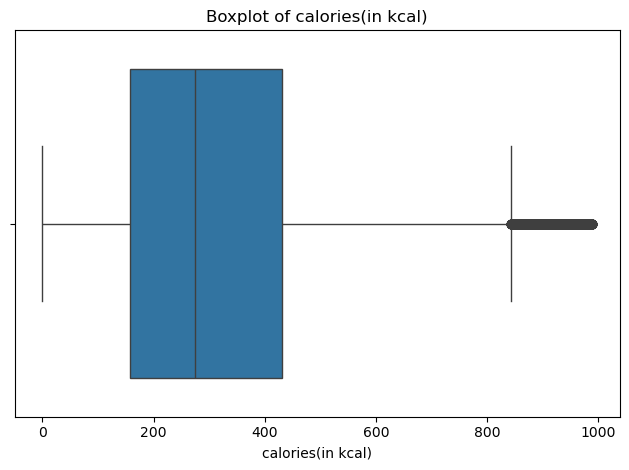

Mean: 314.1155665279206
Median: 275.3
Mode: 0    226.2
Name: calories(in kcal), dtype: float64


In [18]:
# Plot for calories (in kcal)
plot_distribution(recipe_cleaned, 'calories(in kcal)', bins=25)

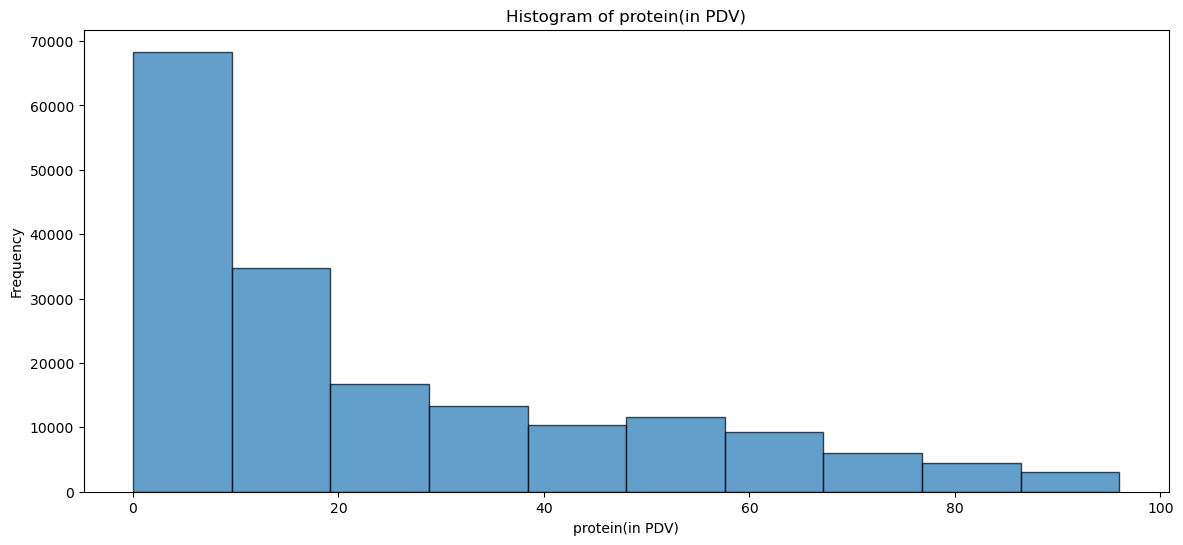

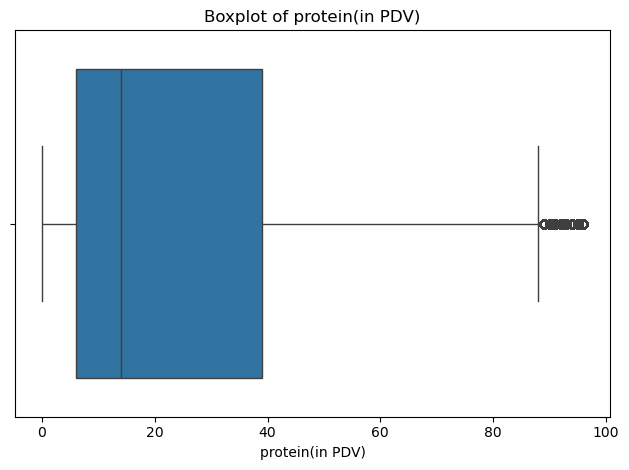

Mean: 24.274554411508625
Median: 14.0
Mode: 0    0.0
Name: protein(in PDV), dtype: float64


In [19]:
# Plot for protein (in PDV)
plot_distribution(recipe_cleaned, 'protein(in PDV)', bins=10)

In [22]:
recipe_cleaned

,recipe_id,recipe_name,ingredients_list,minutes,n_steps,precedure_steps,tags,description,calories(in kcal),protein(in PDV)
0,137739,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...",55,11,"['make a choice and proceed with recipe', 'dep...","['60-minutes-or-less', 'time-to-make', 'course...",autumn is my favorite time of year to cook! th...,51.5,2.0
1,31490,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...",30,9,"['preheat oven to 425 degrees f', 'press dough...","['30-minutes-or-less', 'time-to-make', 'course...",this recipe calls for the crust to be prebaked...,173.4,22.0
2,112140,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...",130,6,"['brown ground beef in large pot', 'add choppe...","['time-to-make', 'course', 'preparation', 'mai...",this modified version of 'mom's' chili was a h...,269.8,39.0
3,59389,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...",45,11,['place potatoes in a large pot of lightly sal...,"['60-minutes-or-less', 'time-to-make', 'course...","this is a super easy, great tasting, make ahea...",368.1,14.0
5,25274,aww marinated olives,"['fennel seeds', 'green olives', 'ripe olives'...",15,4,['toast the fennel seeds and lightly crush the...,"['15-minutes-or-less', 'time-to-make', 'course...",my italian mil was thoroughly impressed by my ...,380.7,6.0
...,...,...,...,...,...,...,...,...,...,...
226652,486161,zydeco soup,"['celery', 'onion', 'green sweet pepper', 'gar...",60,7,"['heat oil in a 4-quart dutch oven', 'add cele...","['ham', '60-minutes-or-less', 'time-to-make', ...",this is a delicious soup that i originally fou...,415.2,44.0
226653,493372,zydeco spice mix,"['paprika', 'salt', 'garlic powder', 'onion po...",5,1,['mix all ingredients together thoroughly'],"['15-minutes-or-less', 'time-to-make', 'course...",this spice mix will make your taste buds dance!,14.8,1.0
226654,308080,zydeco ya ya deviled eggs,"['hard-cooked eggs', 'mayonnaise', 'dijon must...",40,7,"['in a bowl , combine the mashed yolks and may...","['60-minutes-or-less', 'time-to-make', 'course...","deviled eggs, cajun-style",59.2,6.0
226655,298512,cookies by design cookies on a stick,"['butter', 'eagle brand condensed milk', 'ligh...",29,9,['place melted butter in a large mixing bowl a...,"['30-minutes-or-less', 'time-to-make', 'course...","i've heard of the 'cookies by design' company,...",188.0,7.0


# Saving the Cleaned data

In [20]:
recipe_cleaned.to_csv("recipe_cleaned.csv")